# Uber-Fare-Prediction

The main objective of project is to design an algorithm which will tell the fare to be charged for a passenger. Machine learning algorithms are used to develop a regression model.

Problem Statement : The project is about on world's largest taxi company Uber inc. In these project we're looking to predict the fare for their future transactional cases. And this company deliever services to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. So, it becomes really important to estimate the fare prices accurately.

Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc. 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
df=pd.read_csv('uber.csv')

### Pre-process the dataset

In [3]:
#first 5 columns of the dataset
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
#shape of the dataset
df.shape

(200000, 9)

In [5]:
# Info of the Dataset : Null-NotNull , Count , Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
# Describe : Min, Max, Std, Mean, Count, 25 Percentile, 50 Percentile , 75 Percentile
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
#column names and no. of columns
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [8]:
# drop unnamed & key column as it is not required
df=df.drop(['Unnamed: 0','key'],axis=1)

In [9]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


#### Filling missing values

In [12]:
# value : present- False , absent- True
df.isnull()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False


In [13]:
#checking the null value in the dataset
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [14]:
df.isnull().sum().sum()

2

In [15]:
#filling or replacing the null value with the mean of the column
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(), inplace=True)
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(), inplace=True)

In [16]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [17]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

##### pickup_datetime - object (wrong format) : converting the pickup_datetime to datetime format

In [18]:
# errors : {'ignore', 'coerce', 'raise'} default-'raise'
# raise: invalid parsing will raise an exception
# coerce: invalid parsing will set or replace as null value
# ignore: invalid parsing will return the input or directly ignore
df.pickup_datetime = pd.to_datetime(df.pickup_datetime , errors = 'coerce', utc=True)

In [19]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [20]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [21]:
df=df.assign(hour=df.pickup_datetime.dt.hour,
             day=df.pickup_datetime.dt.day,
             month=df.pickup_datetime.dt.month,
             year=df.pickup_datetime.dt.year,
             dayofweek=df.pickup_datetime.dt.dayofweek,
             dayName=df.pickup_datetime.dt.day_name()
            )

In [22]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dayName
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,Thursday
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,Friday
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,Monday
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,Friday
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,Thursday


In [23]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,13.491335,15.704670,6.281795,2011.742440,3.048425
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997,6.515531,8.687409,3.438925,1.856397,1.946946
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,31.000000,12.000000,2015.000000,6.000000


In [24]:
x=df.fare_amount.value_counts()
x

6.50      9684
4.50      8247
8.50      7521
5.70      5858
5.30      5838
          ... 
140.25       1
190.00       1
45.16        1
28.20        1
89.10        1
Name: fare_amount, Length: 1244, dtype: int64

In [25]:
print('max count : ',x[6.5])

max count :  9684


In [26]:
# drop the pickup_datetime column using drop()
# axis=1 to drop the column wise
df=df.drop(['pickup_datetime'],axis=1)

In [27]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dayName
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,Thursday
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,Friday
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,Monday
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,Friday
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,Thursday


In [28]:
df=df.drop(['dayName'],axis=1)

In [29]:
# So there is no incorrect coordinates in the dataset now and can proceed for the further process
# and if present than remove the incorrect coordinates

In [30]:
#finding the incorrect latitudes range = less than -90 to greater than 90 and longitudes = less than -180 to greater than 180
incorrect_coordinates = df.loc[(df.pickup_latitude>90) | (df.pickup_latitude< -90) | 
                                 (df.dropoff_latitude>90) | (df.dropoff_latitude< -90) |
                                 (df.pickup_longitude>180) | (df.pickup_longitude< -180) |
                                 (df.dropoff_longitude>180) | (df.dropoff_longitude< -180)]
incorrect_coordinates

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
4949,4.9,-748.016667,40.739957,-74.003570,40.734192,1,0,28,4,2012,5
32549,15.7,-74.016055,40.715155,-737.916665,40.697862,2,10,16,6,2012,5
48506,33.7,-735.200000,40.770092,-73.980187,40.765530,1,23,5,11,2011,5
56617,8.1,-73.960828,404.433332,-73.988357,40.769037,1,7,11,3,2012,6
61793,8.5,-73.951385,401.066667,-73.982110,40.754117,1,5,13,6,2012,2
75851,15.7,-1340.648410,1644.421482,-3356.666300,872.697628,1,0,5,11,2011,5
91422,16.1,57.418457,1292.016128,1153.572603,-881.985513,1,13,18,5,2011,2
103745,12.9,-736.216667,40.767035,-73.982377,40.725562,1,19,14,10,2011,4
139447,13.7,-74.011042,40.709780,-73.983163,493.533332,4,11,20,1,2012,4
144253,7.3,-768.550000,40.757812,-73.997040,40.740007,1,11,26,8,2009,2


In [31]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [32]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2


#### Checking outlier and handling them

In [33]:
number_of_columns=len(df.columns)
number_of_columns

11

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  200000 non-null  float64
 4   dropoff_latitude   200000 non-null  float64
 5   passenger_count    200000 non-null  int64  
 6   hour               200000 non-null  int64  
 7   day                200000 non-null  int64  
 8   month              200000 non-null  int64  
 9   year               200000 non-null  int64  
 10  dayofweek          200000 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 16.8 MB


<AxesSubplot:>

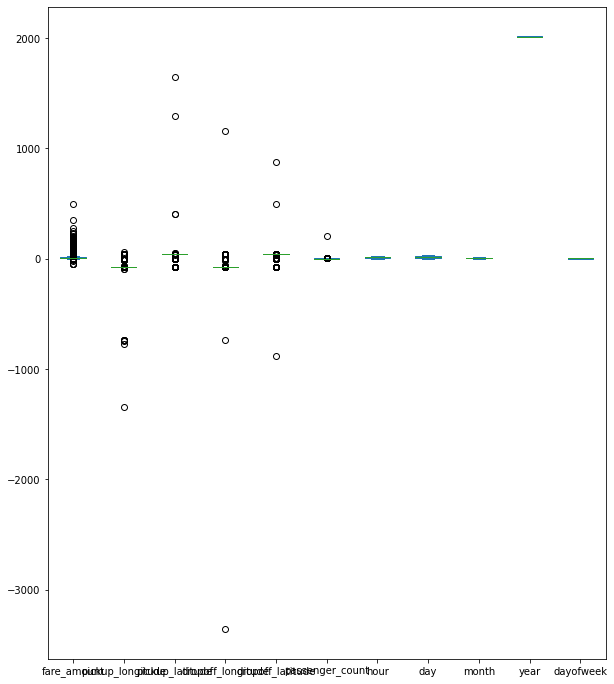

In [35]:
#plot boxplot to check the outlier
df.plot(kind = "box",subplots = False, layout=(7,2) , figsize=(10,12))

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

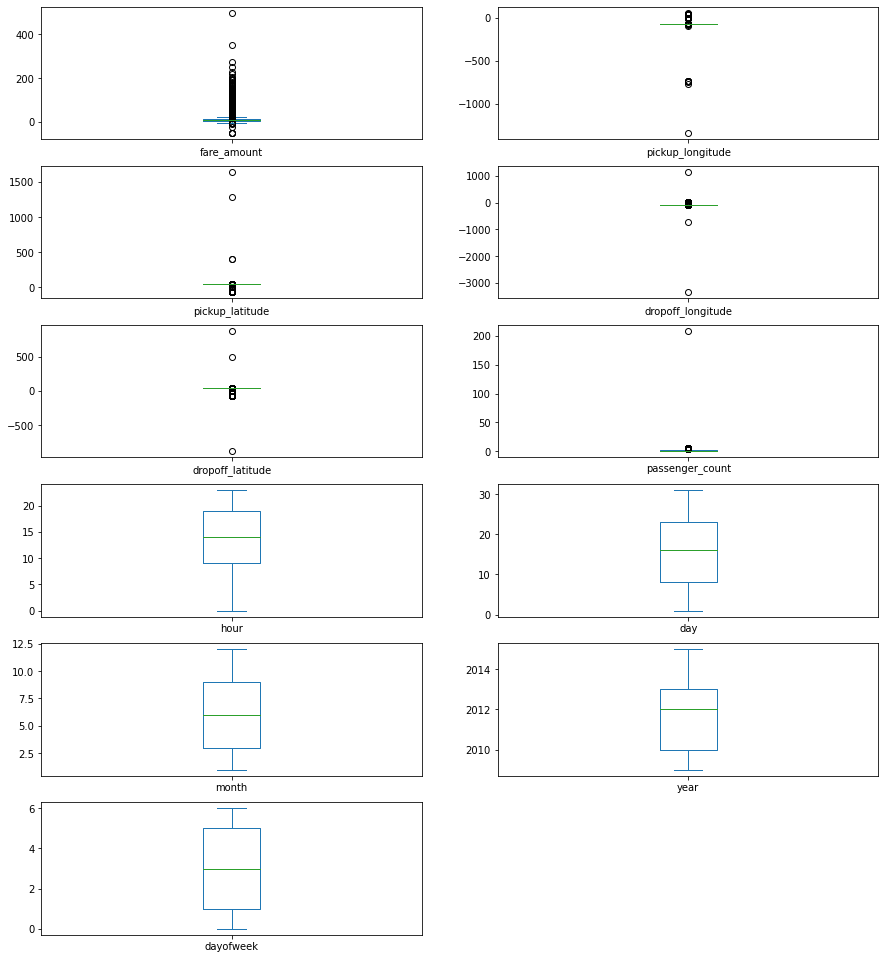

In [36]:
#box plot for each columns
df.plot(kind="box", subplots = True, layout=(7,2), figsize = (15,20))

fare_amount              AxesSubplot(0.125,0.71587;0.227941x0.16413)
pickup_longitude      AxesSubplot(0.398529,0.71587;0.227941x0.16413)
pickup_latitude       AxesSubplot(0.672059,0.71587;0.227941x0.16413)
dropoff_longitude       AxesSubplot(0.125,0.518913;0.227941x0.16413)
dropoff_latitude     AxesSubplot(0.398529,0.518913;0.227941x0.16413)
passenger_count      AxesSubplot(0.672059,0.518913;0.227941x0.16413)
hour                    AxesSubplot(0.125,0.321957;0.227941x0.16413)
day                  AxesSubplot(0.398529,0.321957;0.227941x0.16413)
month                AxesSubplot(0.672059,0.321957;0.227941x0.16413)
year                       AxesSubplot(0.125,0.125;0.227941x0.16413)
dayofweek               AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

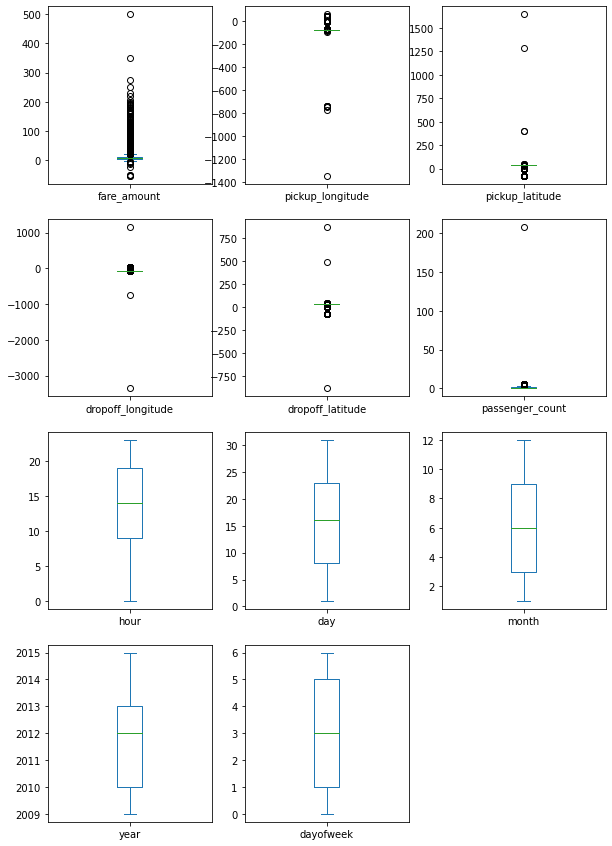

In [37]:
df.plot(kind='box', subplots = True, layout = (4,3), figsize=(10,15))

### Conclusion : Number of spaces for subplots generated can be >= actual number of subplots (of the quantative columns) but not <the actual number of subplots


### Explanation of clip function

In [38]:
a = np.arange(10,100,10) #consider from 10 to 99 with step size of 10
a1= np.clip(a,30,60)     # np.clip(list, lowerlimit, upperlimit)
print('Before Clipping',a)
print('After Clipping',a1)

Before Clipping [10 20 30 40 50 60 70 80 90]
After Clipping [30 30 30 40 50 60 60 60 60]


In [39]:
# Elimination of Outlier using Interquartile range to fill the values
def remove_outlier(df1,col):
    Q1 = df1[col].quantile(0.25)
    Q2 = df1[col].quantile(0.50)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 + 1.5*IQR
    print(".......**************************.......")
    print("col : ",col , " Q1 : ",Q1, " Q3 : ",Q2 , " Q3 : ",Q3)
    print(".......**************************.......")       
    df1[col] = np.clip(df1[col], lower_whisker, upper_whisker)
    return df1

def treat_outliers_all(df1, col_list):
    print('Column List : ',col_list)
    for c in col_list:
        df1= remove_outlier(df1, c)
    return df1

In [40]:
df=treat_outliers_all( df, df.columns) 

Column List :  Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek'],
      dtype='object')
.......**************************.......
col :  fare_amount  Q1 :  6.0  Q3 :  8.5  Q3 :  12.5
.......**************************.......
.......**************************.......
col :  pickup_longitude  Q1 :  -73.992065  Q3 :  -73.98182299999999  Q3 :  -73.96715350000001
.......**************************.......
.......**************************.......
col :  pickup_latitude  Q1 :  40.73479575  Q3 :  40.752592  Q3 :  40.767158
.......**************************.......
.......**************************.......
col :  dropoff_longitude  Q1 :  -73.991407  Q3 :  -73.98009300000001  Q3 :  -73.963658
.......**************************.......
.......**************************.......
col :  dropoff_latitude  Q1 :  40.733823  Q3 :  40.753042  Q3 :  40.76800113909912
.......*************

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

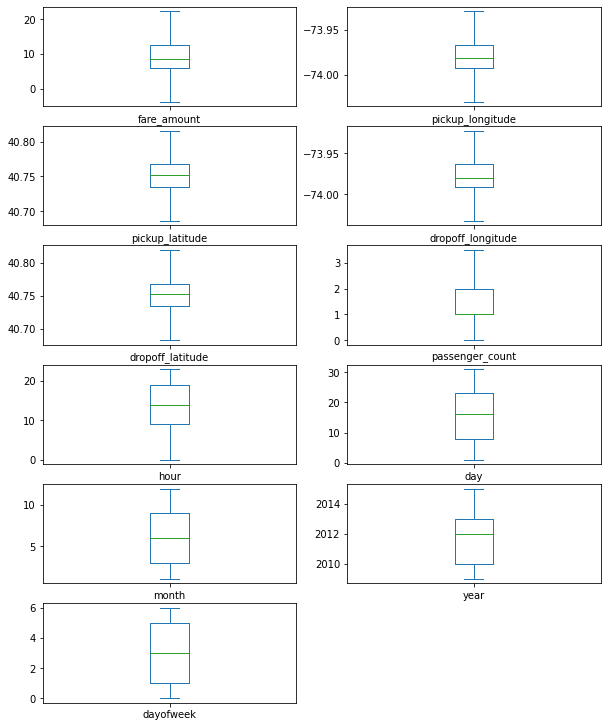

In [41]:
df.plot(kind='box' , subplots=True , layout=(7,2) , figsize=(10,15))

In [42]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [43]:
import haversine as hs #calculate the distance using haversine to calculate the distance between two points. Can't use Eucleadian as it is for flat suface.
travel_dis = []
for pos in range(len(df.pickup_latitude)):
    long1,lat1,long2,lat2 = [df['pickup_longitude'][pos], df['pickup_latitude'][pos], df['dropoff_longitude'][pos], df['dropoff_latitude'][pos]]
    loc1=(lat1,long1)
    loc2=(lat2,long2)
    c = hs.haversine(loc1,loc2)
    travel_dis.append( c )

print(travel_dis)
df['dis_travel_km']=travel_dis
df

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dis_travel_km
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.00,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,10,28,10,2012,6,0.112210
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,1,14,3,2014,4,1.875053
199997,22.25,-73.986017,40.756487,-73.922034,40.692588,2.0,0,29,6,2009,0,8.919418
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,14,20,5,2015,2,3.539720


In [44]:
#uber does'nt drive less than 1 km & more than 130 km so minimize the distance
df=df[(df.dis_travel_km >= 1) & (df.dis_travel_km <= 130)]
print('Remaining observations in the datasets : ',df.shape) 

Remaining observations in the datasets :  (163040, 12)


In [45]:
bool_df= df.isnull()
bool_df


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dis_travel_km
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
199994,False,False,False,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

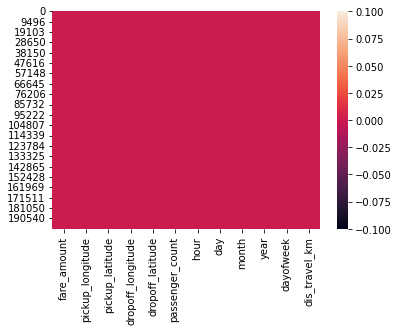

In [46]:
sns.heatmap(bool_df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<AxesSubplot:>

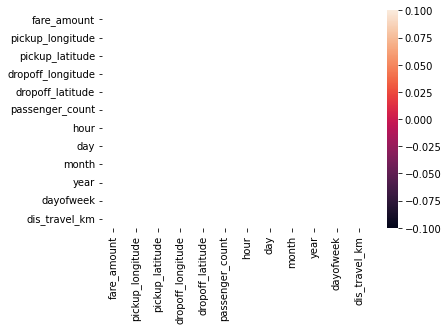

In [47]:
sns.heatmap(bool_df.corr())

In [48]:
corr=df.corr() #fumction to find the correaltion

In [49]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dis_travel_km
fare_amount,1.000000,0.193177,-0.119469,0.258616,-0.137745,0.015056,-0.029760,0.001607,0.031339,0.161861,0.009264,0.798927
pickup_longitude,0.193177,1.000000,0.425309,0.241587,0.169203,-0.012892,0.013057,-0.004459,0.000863,0.014862,-0.028392,0.130003
pickup_latitude,-0.119469,0.425309,1.000000,0.148775,0.358836,-0.016186,0.031484,0.002907,0.001627,-0.016172,-0.044618,-0.143530
dropoff_longitude,0.258616,0.241587,0.148775,1.000000,0.401698,-0.008670,-0.059730,-0.005912,0.002404,0.015657,-0.002164,0.247271
dropoff_latitude,-0.137745,0.169203,0.358836,0.401698,1.000000,-0.007419,0.019775,-0.000130,-0.001663,-0.010472,-0.031153,-0.111577
passenger_count,0.015056,-0.012892,-0.016186,-0.008670,-0.007419,1.000000,0.020203,0.002730,0.009936,-0.007765,0.047728,0.007754
hour,-0.029760,0.013057,0.031484,-0.059730,0.019775,0.020203,1.000000,0.005447,-0.002887,0.002574,-0.090975,-0.047252
day,0.001607,-0.004459,0.002907,-0.005912,-0.000130,0.002730,0.005447,1.000000,-0.017113,-0.011725,0.005673,0.001019
month,0.031339,0.000863,0.001627,0.002404,-0.001663,0.009936,-0.002887,-0.017113,1.000000,-0.113429,-0.010483,0.008433
year,0.161861,0.014862,-0.016172,0.015657,-0.010472,-0.007765,0.002574,-0.011725,-0.113429,1.000000,0.006522,0.020138


<AxesSubplot:>

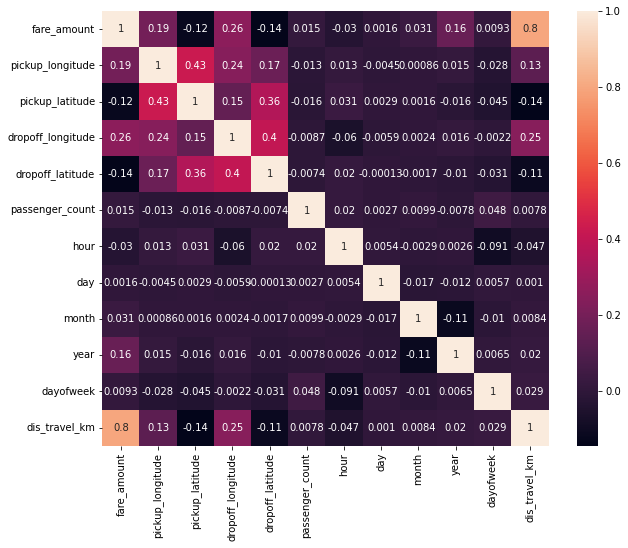

In [50]:
#plotting heatmap on the data set
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr() , annot = True ) #light colour means highly correlated

### Dividing the datasets into target and labels

In [51]:
#Divide the dataset into Label and the target or input or the output
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek', 'dis_travel_km'],
      dtype='object')

In [52]:
X=df[df.columns[1:]] #target columns

In [53]:
y=df.fare_amount

In [54]:
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dis_travel_km
0,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088


In [55]:
y.head()

0     7.5
1     7.7
2    12.9
3     5.3
4    16.0
Name: fare_amount, dtype: float64

## Dividing the datasets into training & testing datasets

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y, test_size=0.20,random_state=42)

In [145]:
X_train

array([[-0.72963521, -0.40232789,  0.97689652, ..., -1.48409055,
         0.99266357,  1.15839582],
       [ 0.88391342,  1.14509458,  0.68291519, ...,  0.13334448,
         1.50498173, -0.37796584],
       [-0.46165745, -0.25133475, -1.05449864, ...,  0.67248948,
         0.48034541, -0.60443856],
       ...,
       [-0.81387793, -0.98671289, -1.52484368, ...,  1.7507795 ,
         0.99266357, -0.61594458],
       [ 1.34842235, -2.67404107,  0.43435105, ..., -0.40580053,
        -0.03197275,  2.43448644],
       [-0.7672084 ,  0.4023104 , -0.47256519, ..., -0.40580053,
         0.48034541, -1.01212288]])

In [146]:
X_test

array([[-0.67481111,  0.28337603, -0.71110487, ..., -1.48409055,
        -1.56892723, -0.45438457],
       [-0.51432919, -0.69549806, -0.29254587, ...,  1.7507795 ,
         0.99266357, -0.38315055],
       [-1.82729465, -1.4952894 , -0.84365713, ...,  0.13334448,
        -1.05660907,  0.38340709],
       ...,
       [ 1.17308369,  1.34501954,  1.44554403, ...,  0.13334448,
        -0.54429091, -0.83524359],
       [-0.15477556,  0.73429776, -0.53557739, ..., -0.40580053,
         0.48034541, -0.98816445],
       [-0.46201577, -0.97720474, -1.35174392, ..., -0.40580053,
        -1.05660907, -0.3507564 ]])

In [147]:
y_train

162755    10.50
98963      8.10
18976     11.00
117355     5.50
131159    22.25
          ...  
147051     6.50
127158     8.50
161902     7.00
180207    10.10
149639     3.70
Name: fare_amount, Length: 130432, dtype: float64

In [148]:
y_test

84906      8.1
197858    11.0
159216    10.9
125619    15.7
19806     11.0
          ... 
101058     7.0
39460      2.9
161258     8.5
26245      5.3
74563      7.7
Name: fare_amount, Length: 32608, dtype: float64

In [149]:
from sklearn.linear_model import LinearRegression
regression= LinearRegression()

In [150]:
regression.fit(X_train,y_train)

LinearRegression()

In [151]:
 regression.intercept_

10.974822138549422

In [152]:
regression.coef_

array([ 0.54311233, -0.1711075 ,  0.47523381, -0.51830714,  0.05681145,
        0.05706274,  0.01755483,  0.2200428 ,  0.78698494, -0.07864407,
        3.97960822])

In [153]:
y_pred=regression.predict(X_test)   #to predict the value

In [154]:
comparison=pd.DataFrame({"Actual Label":y_test,"Predicted Label":y_pred})

In [155]:
comparison

,Actual Label,Predicted Label
84906,8.1,7.854541
197858,11.0,10.391873
159216,10.9,11.233910
125619,15.7,8.994059
19806,11.0,13.982142
...,...,...
101058,7.0,8.232227
39460,2.9,7.137128
161258,8.5,8.039556
26245,5.3,5.672283


In [156]:
comparison.reset_index()

,index,Actual Label,Predicted Label
0,84906,8.1,7.854541
1,197858,11.0,10.391873
2,159216,10.9,11.233910
3,125619,15.7,8.994059
4,19806,11.0,13.982142
...,...,...,...
32603,101058,7.0,8.232227
32604,39460,2.9,7.137128
32605,161258,8.5,8.039556
32606,26245,5.3,5.672283


In [157]:
comparison.reset_index().drop(['index'],axis=1)

,Actual Label,Predicted Label
0,8.1,7.854541
1,11.0,10.391873
2,10.9,11.233910
3,15.7,8.994059
4,11.0,13.982142
...,...,...
32603,7.0,8.232227
32604,2.9,7.137128
32605,8.5,8.039556
32606,5.3,5.672283


<AxesSubplot:>

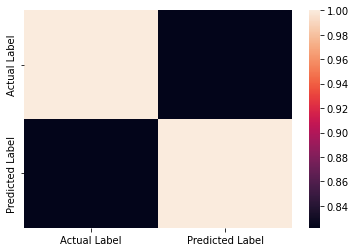

In [158]:
sns.heatmap(comparison.corr())

## Metrics Evaluation using R2, Mean Squared Error, Root Mean Squared Error

In [159]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [160]:
r2_score(y_test,y_pred)

0.6756850347887022

In [161]:
MSE = mean_squared_error(y_test,y_pred)

In [162]:
MSE

9.328521145502624

In [163]:
RMSE = np.sqrt(MSE)

In [164]:
RMSE

3.0542627826535527

### Standard Scaler

In [143]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

## Random Forest Regressor

In [165]:
from sklearn.ensemble import RandomForestRegressor

In [166]:
rf = RandomForestRegressor(n_estimators=300,max_depth=20,max_features=5,random_state=16) # here n_estimators means no. of Decision Trees to be made to make the prediction

In [167]:
'''from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)'''


'from sklearn.model_selection import KFold, cross_val_score\nk_fold = KFold(n_splits=5, shuffle=True, random_state=42)'

In [168]:
#mse_scores = cross_val_score(rf, X, y, cv=k_fold, scoring='neg_mean_squared_error')


In [169]:
#rmse_scores

In [170]:
'''from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [100,150,200,250,300],
    'max_depth': [10,15,20,25,30],
    'max_features': [3,5,6,7,8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=k_fold, n_jobs=-1)'''

"from sklearn.model_selection import GridSearchCV, KFold\nfrom sklearn.metrics import mean_squared_error\nrf = RandomForestRegressor()\n\nparam_grid = {\n    'n_estimators': [100,150,200,250,300],\n    'max_depth': [10,15,20,25,30],\n    'max_features': [3,5,6,7,8],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4]\n}\nk_fold = KFold(n_splits=5, shuffle=True, random_state=42)\n\ngrid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=k_fold, n_jobs=-1)"

In [171]:

'''grid_search.fit(X_train, y_train)
grid_search.best_params_
grid_search.best_estimator_

clf.fit(X_train, y_train)
clf.best_params_'''

'grid_search.fit(X_train, y_train)\ngrid_search.best_params_\ngrid_search.best_estimator_\n\nclf.fit(X_train, y_train)\nclf.best_params_'

In [172]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, max_features=5, n_estimators=300,
                      random_state=16)

In [129]:
importances = rf.feature_importances_


final_df = pd.DataFrame({"Features": pd.DataFrame(X).columns, "Importances" :importances})
final_df.set_index('Importances')

final_df = final_df.sort_values("Importances", ascending=False)

In [130]:
final_df # so this convey that we should not take more than 7 features

,Features,Importances
10,dis_travel_km,0.601383
2,dropoff_longitude,0.114163
0,pickup_longitude,0.101687
3,dropoff_latitude,0.055948
1,pickup_latitude,0.035997
8,year,0.033847
5,hour,0.020552
6,day,0.011875
7,month,0.011455
9,dayofweek,0.009265


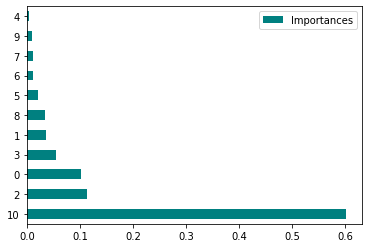

In [131]:
final_df.plot (kind='barh', color = 'teal')
plt.show()

In [132]:
y_pred = rf.predict(X_test)

In [133]:
y_pred

array([ 8.12148524, 10.77371304, 11.94398914, ..., 13.59172408,
        6.78686725,  8.62109351])

In [134]:
r2=r2_score(y_test,y_pred)

In [135]:
r2

0.8313016525519572

In [141]:
from sklearn.metrics import mean_squared_error,accuracy_score

In [137]:
MSE = mean_squared_error(y_test,y_pred)

In [138]:
MSE

4.82234610716714

In [139]:
RMSE=np.sqrt(MSE)

In [140]:
RMSE

2.195984086273655